In [193]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [194]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_p=0.01, num_epochs=1000):
        # Learning rate is the step size to take in the gradient descent
        self.learning_rate = learning_rate
        # Lambda indicates the regularization strength (how much the weights are penalized)
        self.lambda_p = lambda_p
        # Number of iterations to run the gradient descent for
        self.num_epochs = num_epochs
        self.W = None
        self.b = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Since the y may not be 1 or -1, we need to convert it to 1 or -1
        y_ = np.where(y <= 0, -1, 1)
        # The weights matrix has the same dimension as the number of features. This is called primal form
        self.w = np.zeros(num_features)
        self.b = 0

        for _ in range(self.num_epochs):
            for i, x in enumerate(X):
                # evaluate the gradient of the loss function (the hinge loss function)
                t = y_[i] * (np.dot(x, self.w) - self.b)
                # Run gradient descent on the weights and bias
                # The formulas are obtained by taking the partial derivative of the loss function w.r.t the weights and bias
                if t >= 1:
                    self.w -= self.learning_rate * (2 * self.lambda_p * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_p * self.w - np.dot(x, y_[i]))
                    self.b -= self.learning_rate * y_[i]
    
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

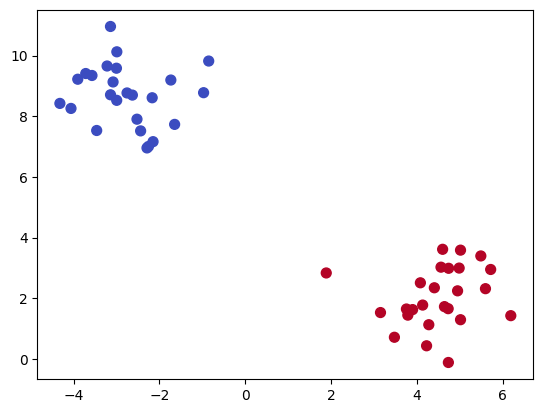

[ 0.52735146 -0.08786235] -0.2630000000000002


In [195]:
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=42
)

# Plot the X and y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
plt.show()

# Make the y values -1 or 1
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)

# Print the trained weights and bias matrices
print(clf.w, clf.b)

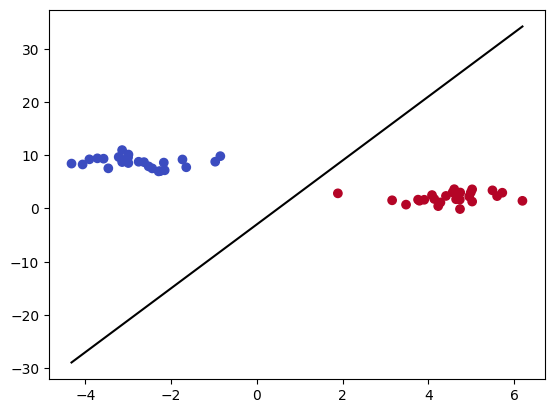

In [196]:
def plot_svm():

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap=plt.cm.coolwarm)

    # Plot the hyperplane
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    w = clf.w
    a = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (clf.b) / w[1]
    plt.plot(xx, yy, 'k-')
    

    plt.show()

plot_svm()